In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 40
pd.options.display.max_rows = 40

!ls data

clean_bios.csv
clean_matches.csv
clean_stats.csv
moneylines_and_fight_stats.csv
ufc_moneylines.csv


# Money Lines

From [sportsbookreview](https://www.sportsbookreview.com/betting-odds/ufc/):
* When Conor McGregor fought Donald Cerrone at UFC 246 in Las Vegas, he was priced at -310 in the UFC Vegas odds. Cerrone was the +240 underdog. If you see a minus sign in UFC betting odds, it tells you how much you need to wager in order to earn a \\$100 profit. In this case, a \\$310 bet on McGregor would have netted you \\$100. A plus sign informs you of the profit you stand to make from a \\$100 bet. A \\$100 bet on Cowboy would have earned you a \\$240 profit if he won.
* **You don't need to understand moneyline conventions**. I already figured out how to get market-implied probabilities of each fighter winning. That's in `FighterOpener`, which will be our benchmark for the probability of `Fighter` winning the fight. 
* `FighterOpener`, `Date`, `FighterID`, and `OpponentID` are pretty much the only columns you want to worry about in this file. 
* Matches in `ufc_moneylines.csv` are only for UFC matches. 

`FighterID` is ESPN's unique identifier for MMA fighters. You can use it to join across `clean_matches.csv`, `clean_bios.csv`, and `clean_stats.csv`. 

In [2]:
ml_df = pd.read_csv("data/ufc_moneylines.csv")
print(ml_df.shape)
ml_df.head()

(2624, 25)


,missing,Date,FighterName,OpponentName,wager_A,wager_B,opener_A,opener_B,bet365_A,bet365_B,...,betway_B,FighterOpener,Opponent,FighterResult,Decision,Rnd,Time,Event,OpponentID,FighterID
0,False,2017-04-08,magomed bibulatov,jenel lausa,48%,52%,-145,+125,-500,+375,...,-,0.571116,Jenel Lausa,W,Decision - Unanimous,3.0,5:00,UFC 210: Cormier vs. Johnson 2,4058117/jenel-lausa,3151939/magomed-bibulatov
1,False,2017-04-08,irene aldana,katlyn chookagian,55%,45%,+145,-170,+130,-160,...,-,0.393299,Katlyn Chookagian,L,Decision - Split,3.0,5:00,UFC 210: Cormier vs. Johnson 2,4026490/katlyn-chookagian,3136286/irene-aldana
2,False,2017-04-08,desmond green,josh emmett,58%,42%,+190,-225,+180,-220,...,-,0.332481,Josh Emmett,W,Decision - Split,3.0,5:00,UFC 210: Cormier vs. Johnson 2,4011299/josh-emmett,3039667/desmond-green
3,False,2017-04-08,andrew holbrook,gregor gillespie,50%,50%,+185,-220,+200,-250,...,-,0.337909,Gregor Gillespie,L,KO/TKO,1.0,0:21,UFC 210: Cormier vs. Johnson 2,4021934/gregor-gillespie,3904497/andrew-holbrook
4,False,2017-04-08,jan blachowicz,patrick cummins,45%,55%,-125,+105,-125,+100,...,-,0.532468,Patrick Cummins,L,Decision - Unanimous,3.0,5:00,UFC 210: Cormier vs. Johnson 2,2536068/patrick-cummins,2506250/jan-blachowicz


# Matches

[ESPN keeps track](https://www.espn.com/mma/fighter/stats/_/id/3933168/francis-ngannou) of the outcomes of every fight/match. `clean_matches.csv` contains these results.

**All the matches in `ml_df` have already been joined with `match_df`, so you don't need this unless you want to look at fights for which I don't have odds info.**

In [60]:
match_df = pd.read_csv("data/clean_matches.csv")
print(match_df.shape)
match_df.head()

(115653, 11)


,Date,Opponent,FighterResult,Decision,Rnd,Time,Event,OpponentID,FighterID,FighterName,OpponentName
0,2010-10-09,Katja Kankaanpaa,L,Submission (Brabo Choke),2,2:12,BP 9: Animal Factory,3041457/katja-kankaanpaa,3043549/niina-aaltonen,niina aaltonen,katja kankaanpaa
1,2009-01-17,Francisco Mario Marinho,W,KO,1,3:22,Shooto: Brazil 10,3099605/francisco-mario-marinho,3032024/felipe-olivieri,felipe olivieri,francisco mario marinho
2,2009-03-19,Mauricio Reis,W,KO,2,1:18,WOCS: Watch Out Combat Show 3,2396140/mauricio-reis,3032024/felipe-olivieri,felipe olivieri,mauricio reis
3,2009-06-25,Alex Cobra,W,Submission (Rear Naked Choke),1,-,WOCS: Watch Out Combat Show 4,2966218/alex-cobra,3032024/felipe-olivieri,felipe olivieri,alex cobra
4,2009-08-08,Koji Oishi,L,Decision - Majority,2,5:00,Pancrase: Changing Tour 4,2486935/koji-oishi,3032024/felipe-olivieri,felipe olivieri,koji oishi


# Match Stats

Every [fighter's page](https://www.espn.com/mma/fighter/stats/_/id/4350762/zhang-weili) tracks the following statistics for each match:

```
GLOSSARY
%BODY:Target Breakdown Body
%HEAD:Target Breakdown Head
%LEG:Target Breakdown Leg
AD:Advances
ADHG:Advance To Half Guard
ADTB:Advance To Back
ADTM:Advance To Mount
ADTS:Advance To Side
KD:Knockdowns
RV:Reversals
SCBA:Significant Clinch Body Strike Attempts
SCBL :Significant Clinch Body Strikes Landed
SCHA:Significant Clinch Head Strike Attempts
SCHL:Significant Clinch Head Strikes Landed
SCLA:Significant Clinch Leg Strike Attempts
SCLL:Significant Clinch Leg Strikes Landed
SDBL/A:Significant Distance Body Strikes Landed-Significant Distance Body Strike Attempts
SDHL/A:Significant Distance Head Strikes Landed-Significant Distance Head Strike Attempts
SDLL/A:Significant Distance Leg Strikes Landed-Significant Distance Leg Strike Attempts
SGBA :Significant Ground Body Strike Attempts
SGBL:Significant Ground Body Strikes Landed
SGHA:Significant Ground Head Strike Attempts
SGHL:Significant Ground Head Strikes Landed
SGLA:Significant Ground Leg Strikes Attempted
SGLL:Significant Ground Leg Strikes Landed
SM:Submissions
SR:Slam Rate
SSA:Significant Strikes Attempts
SSL:Significant Strikes Landed
TDA:Takedowns Attempted
TDL:Takedowns Landed
TDS:Takedowns Slams
TK ACC:Takedown Accuracy
TSA:Total Strikes Attempts
TSL:Total Strikes Landed
TSL-TSA:Total Strikes Landed-Total Strikes Attempts
```

In [3]:
stats_df = pd.read_csv("data/clean_stats.csv")
print(stats_df.shape)
stats_df.head()

(55668, 48)


,Date,Opponent,Event,FighterResult,SDBL/A,SDHL/A,SDLL/A,TSL,TSA,SSL,...,ADTS,SM,FighterID,SDBL,SDBA,SDHL,SDHA,SDLL,SDLA,Name
0,2010-10-09,Katja Kankaanpaa,BP 9,L,0/0,0/0,0/0,0.0,0.0,0.0,...,0.0,0.0,3043549/niina-aaltonen,0.0,0.0,0.0,0.0,0.0,0.0,niina aaltonen
1,2013-02-15,Brendan O'Reilly,Fury MMA 5,L,0/0,0/0,0/0,0.0,0.0,0.0,...,0.0,0.0,3089919/mike-aarts,0.0,0.0,0.0,0.0,0.0,0.0,mike aarts
2,2001-01-18,Josh Thomson,Bushido 1,L,0/0,0/0,0/0,0.0,0.0,0.0,...,0.0,0.0,2501542/jason-abajian,0.0,0.0,0.0,0.0,0.0,0.0,jason abajian
3,2015-10-30,Jermaine McDermott,TWC 23,L,0/0,0/0,0/0,0.0,0.0,0.0,...,0.0,0.0,3960654/marcus-abarquez,0.0,0.0,0.0,0.0,0.0,0.0,marcus abarquez
4,2006-09-23,Jorge Gurgel,UFC 63,L,0/1,41/121,0/0,79.0,173.0,56.0,...,0.0,0.0,2556806/danny-abbadi,0.0,1.0,41.0,121.0,0.0,0.0,danny abbadi


# Getting a benchmark score for predictions

How good of a predictor is the opening moneyline? Evaluate by cross-entropy loss. 

I think draws and no contests should be removed from consideration. If I were running a casino and a fighter was kicked out for doing something illegal, or getting popped for steroids, I would just give everybody their money back (casinos do this if you bet on a team and a star player gets in hurt before the game). 

In [4]:
ml_df["FighterResult"].value_counts()

L    1414
W    1010
D      51
Name: FighterResult, dtype: int64

In [5]:
from sklearn.metrics import log_loss

y_true = ml_df["FighterResult"] == "W"
y_pred = ml_df["FighterOpener"]
ignore_inds = y_true.isnull() | y_pred.isnull() | (ml_df["FighterResult"] == "D")
y_true = y_true.loc[~ignore_inds]
y_pred = y_pred.loc[~ignore_inds]

log_loss(y_true=y_true, y_pred=y_pred)

0.6220260010254359

# What I want from you

* Help me understand the relationship between these features, at the fighter level and the fight level. 
* **Something easy to start:**
    1. Calculate average of seemingly useful stats for each fighter (eg average SCBL per fight)
    2. Correlation heatmap of these fighter-level statistics
    3. Run PCA on the entire dataset of fighter-level statistics, and project onto the first two principal components. Make a scatterplot of fighters, embedded into this new space. Are there obvious clusters? 
* **If that was easy, here's what else you can do:**
    4. Run PCA on the entire dataset of fighter-level statistics, and look at the eigenvalues. Is there a clear "elbow point", suggesting an optimal number of principal components to use to describe fighters?
    5. Use first K principal components from 4, project the fighter-level statistics onto them, and run this projected data through your favorite clustering algorithm. What are the cluster centers like? Who are some "archetypical fighters" close to the centers of their respective clusters?
* Eventually I'll think of something you can do requiring you to join `ml_df` with `stats_df`.
* If you just get to step 2 I'll be happy tbh. 

In [89]:
# have to join on match_df in order to get the uhhhh 
cols = sorted(set(match_df.columns) & set(stats_df.columns)) + ["Time"]
stats_time_df = stats_df.merge(match_df[cols], on=["Date", "FighterID", "Opponent"], how="inner")
stats_time_df.shape

(55479, 51)

<AxesSubplot:xlabel='TimeSeconds', ylabel='Count'>

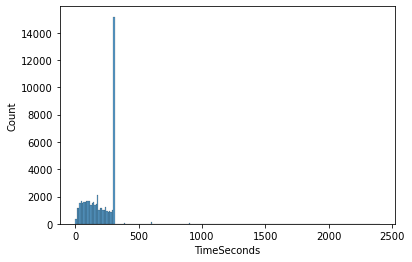

In [94]:
def parse_time(s):
    if s is np.nan:
        return np.nan
    if s == "-":
        return np.nan
    minutes, seconds = s.split(":")
    return 60 * int(minutes) + int(seconds)

stats_time_df["TimeSeconds"] = stats_time_df["Time"].apply(parse_time)
sns.histplot(stats_time_df["TimeSeconds"])

In [83]:
drop_inds = (stats_time_df[stats_cols].isnull() | (stats_time_df[stats_cols] == 0)).all(1)
drop_inds = drop_inds | stats_time_df["TimeSeconds"].isnull()
drop_inds = drop_inds | (stats_time_df["TimeSeconds"] > 300) # I don't trust these fights
drop_inds.mean()

0.8157320788045928

In [149]:
# 1)
stats_cols = ['%BODY','%HEAD','%LEG','AD','ADHG','ADTB','ADTM','ADTS','KD','RV','SCBA','SCBL','SCHA','SCHL','SCLA',
       'SCLL','SGBA','SGBL','SGHA','SGHL','SGLA','SGLL','SM','SR','SSA','SSL','TDA',
       'TDL','TDS','TK ACC','TSA','TSL','TSL-TSA']

prop_cols = ['%BODY','%HEAD','%LEG','SR','TK ACC','TSL-TSA']
count_cols = [col for col in stats_cols if col not in prop_cols]

def get_fighter_mean_stats_df(stats_df):
    drop_inds = (stats_df[stats_cols].isnull() | (stats_df[stats_cols] == 0)).all(1)
    drop_inds = drop_inds | stats_df["TimeSeconds"].isnull()
    drop_inds = drop_inds | (stats_df["TimeSeconds"] > 300) # I don't trust these stats. 40 minute fights?
    stats_sub_df = stats_df.loc[~drop_inds].copy()
    fight_times = stats_sub_df["TimeSeconds"]
    for col in count_cols:
        stats_sub_df[col] /= fight_times
    mean_df = stats_sub_df.groupby("FighterID")[stats_cols].mean()
    fight_count_df = stats_sub_df.groupby("FighterID").size()
    mean_df = mean_df.loc[fight_count_df > 8]
    return mean_df

mean_df = get_fighter_mean_stats_df(stats_time_df)
print(mean_df.shape)
mean_df.head()

(395, 33)


,%BODY,%HEAD,%LEG,AD,ADHG,ADTB,ADTM,ADTS,KD,RV,SCBA,SCBL,SCHA,SCHL,SCLA,SCLL,SGBA,SGBL,SGHA,SGHL,SGLA,SGLL,SM,SR,SSA,SSL,TDA,TDL,TDS,TK ACC,TSA,TSL,TSL-TSA
FighterID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2220951/greg-hardy,0.695455,0.463636,0.524545,0.001263,0.001263,0.000000,0.000000,0.000000,0.008205,0.000000,0.001899,0.001899,0.006366,0.005081,0.000000,0.000000,0.001961,0.001961,0.133127,0.114524,0.000000,0.000000,0.000000,0.000000,0.511079,0.314368,0.001869,0.001263,0.000000,0.090909,0.535522,0.337549,0.556018
2335243/carlos-condit,0.552222,0.298333,0.682222,0.007030,0.001966,0.003821,0.001242,0.000741,0.002105,0.003545,0.015431,0.012701,0.037014,0.017259,0.002432,0.002432,0.003274,0.003274,0.034893,0.023563,0.000379,0.000379,0.005037,0.074056,0.700159,0.274854,0.005867,0.001763,0.000467,0.190000,0.918684,0.480442,0.519989
2335338/randy-couture,0.594583,0.552083,0.708333,0.010749,0.002706,0.002057,0.002040,0.003945,0.000139,0.000365,0.012441,0.009951,0.047420,0.033376,0.013868,0.013228,0.014406,0.014267,0.092296,0.060644,0.000417,0.000417,0.004829,0.032625,0.318864,0.185577,0.027740,0.014532,0.001319,0.563750,0.462287,0.320629,0.667937
2335447/anderson-silva,0.630741,0.537778,0.632222,0.000583,0.000322,0.000127,0.000000,0.000135,0.006834,0.000283,0.021222,0.020880,0.028372,0.020643,0.001611,0.001611,0.003729,0.003322,0.035070,0.027226,0.002716,0.001852,0.001277,0.000000,0.323159,0.216310,0.001960,0.001407,0.000000,0.148148,0.399490,0.264457,0.677493
2335448/patrick-cote,0.521905,0.392857,0.612857,0.004617,0.002294,0.000167,0.000167,0.001989,0.002437,0.001268,0.006916,0.005093,0.041813,0.024925,0.004713,0.004713,0.003002,0.003002,0.050710,0.040408,0.000307,0.000307,0.001202,0.015857,0.385358,0.189963,0.013323,0.001734,0.000159,0.126667,0.489931,0.287379,0.552557


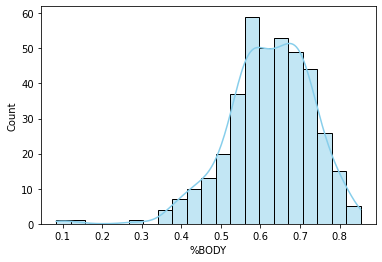

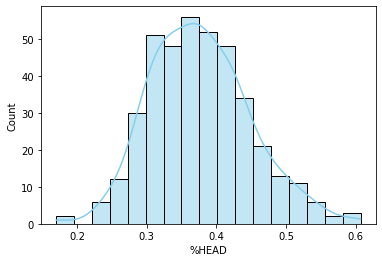

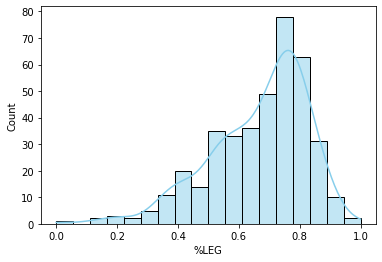

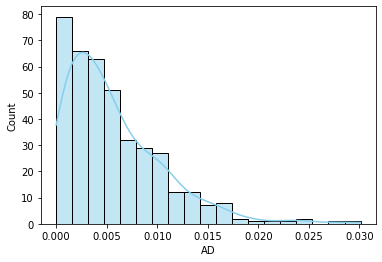

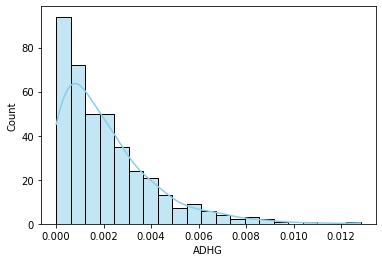

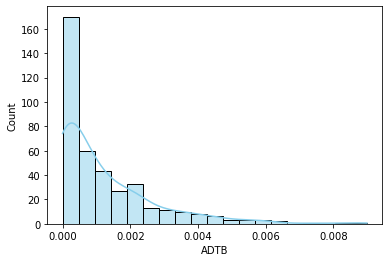

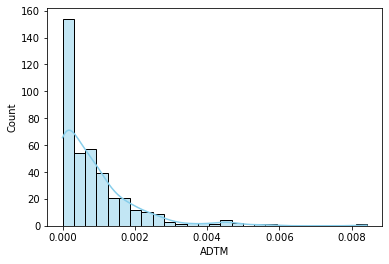

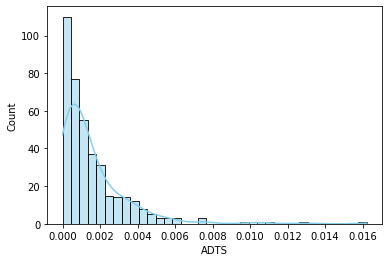

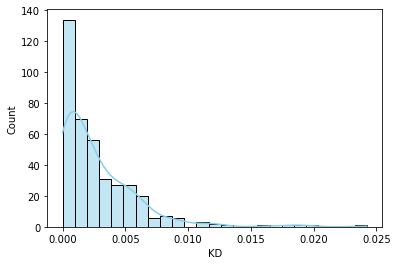

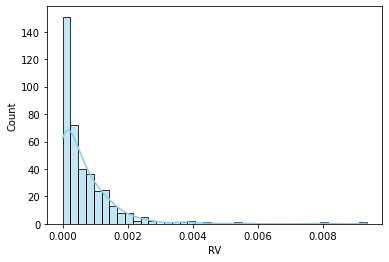

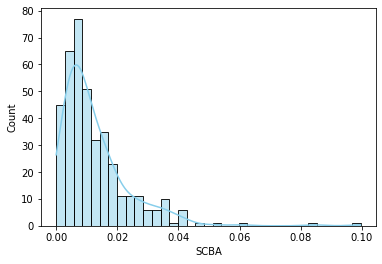

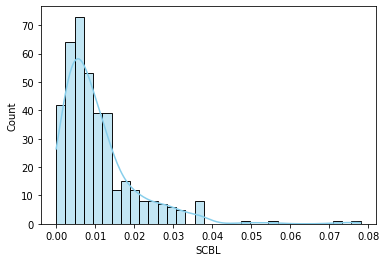

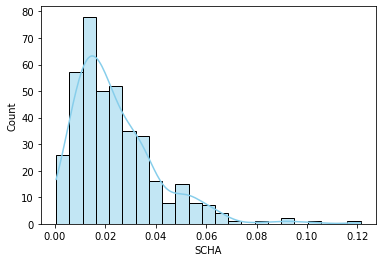

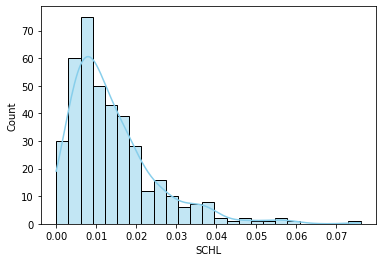

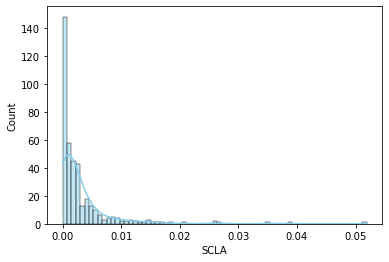

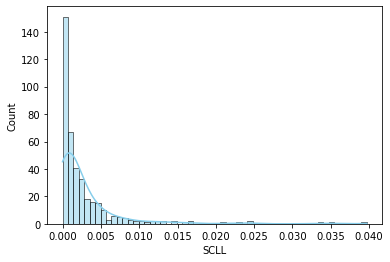

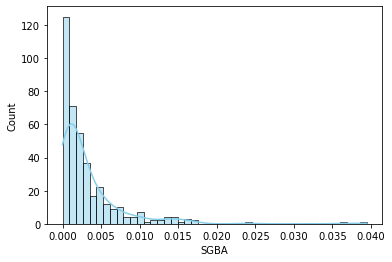

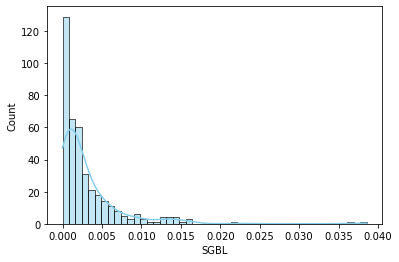

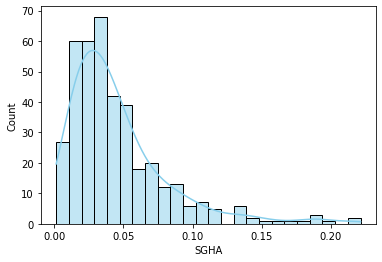

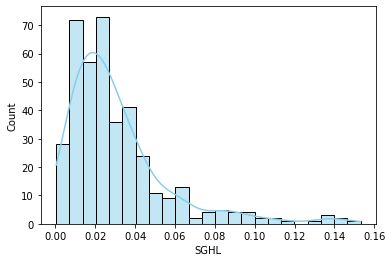

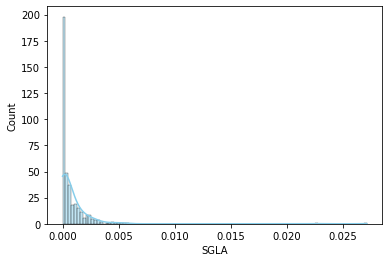

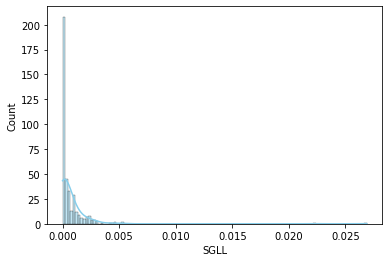

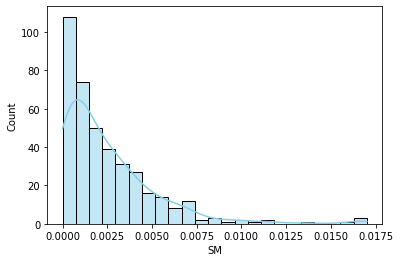

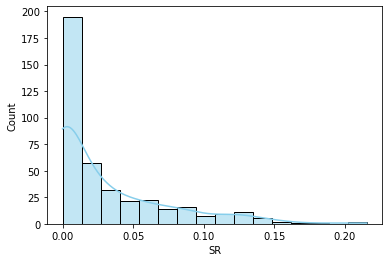

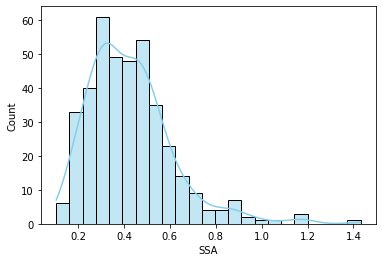

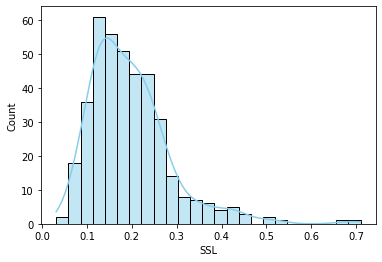

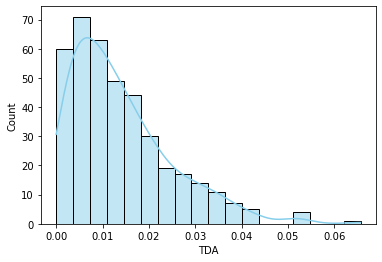

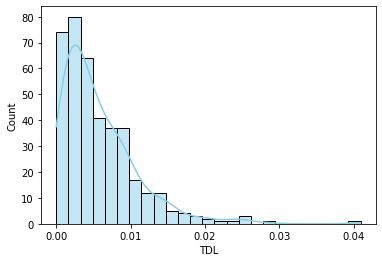

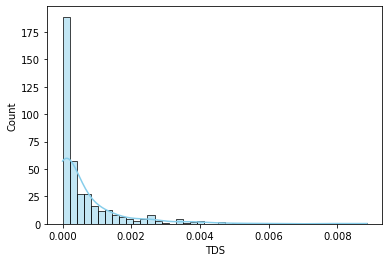

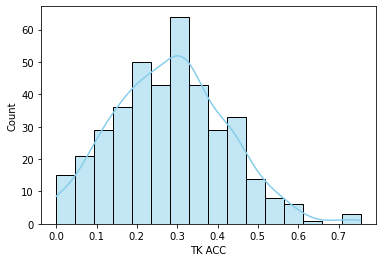

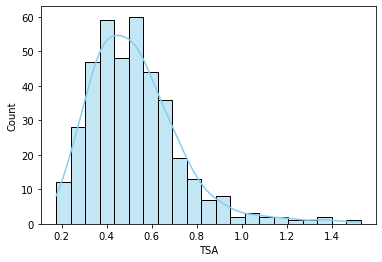

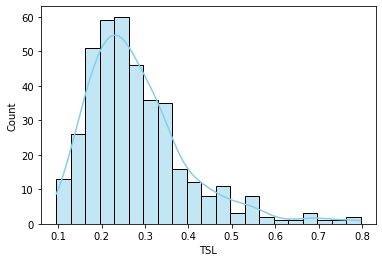

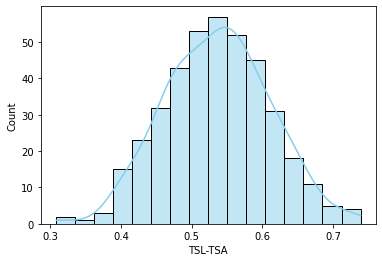

In [150]:
# lots of right-skewed data in here, which explains the fan shape...
for col in stats_cols:
    sns.histplot(data=mean_df, x=col, kde=True, color="skyblue")
    plt.show()

In [151]:
mean_df.loc[['2611557/khabib-nurmagomedov', '2335639/jon-jones']]

,%BODY,%HEAD,%LEG,AD,ADHG,ADTB,ADTM,ADTS,KD,RV,SCBA,SCBL,SCHA,SCHL,SCLA,SCLL,SGBA,SGBL,SGHA,SGHL,SGLA,SGLL,SM,SR,SSA,SSL,TDA,TDL,TDS,TK ACC,TSA,TSL,TSL-TSA
FighterID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2611557/khabib-nurmagomedov,0.680000,0.462500,0.725833,0.024181,0.007489,0.004583,0.004645,0.007465,0.001376,0.0,0.003157,0.002879,0.007036,0.003903,0.002873,0.002222,0.008243,0.008243,0.190072,0.137903,0.002434,0.002434,0.004701,0.121667,0.529993,0.264306,0.043122,0.022146,0.004553,0.454167,0.675029,0.393363,0.582258
2335639/jon-jones,0.760909,0.479091,0.709091,0.009678,0.003559,0.001138,0.000793,0.004188,0.001705,0.0,0.021136,0.018546,0.034834,0.019792,0.010733,0.008587,0.009694,0.009542,0.102938,0.076624,0.000455,0.000455,0.003348,0.064409,0.588653,0.337898,0.020366,0.009161,0.001530,0.508636,0.687641,0.428769,0.634682


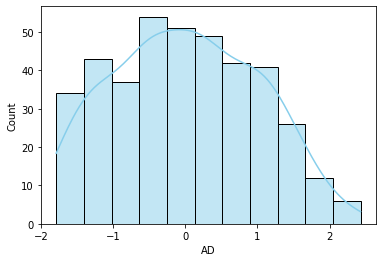

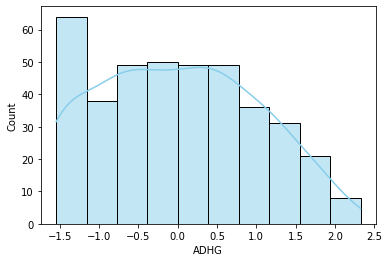

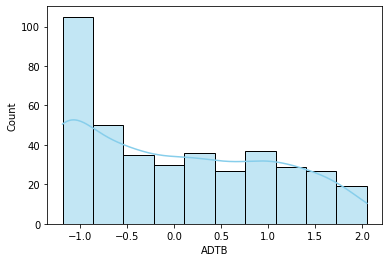

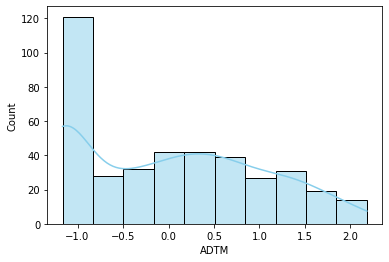

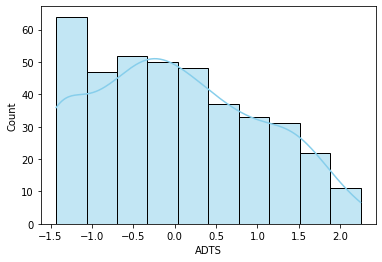

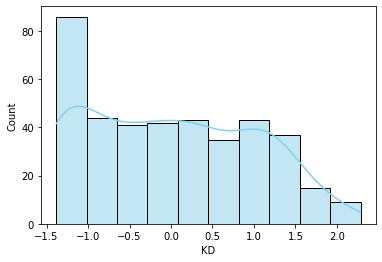

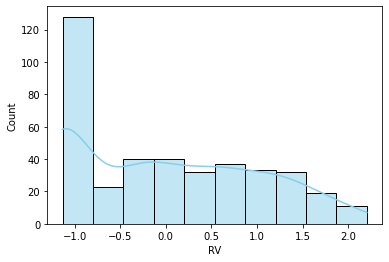

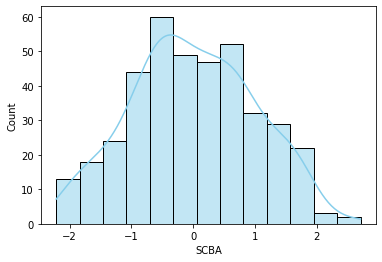

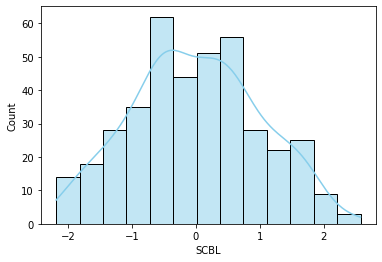

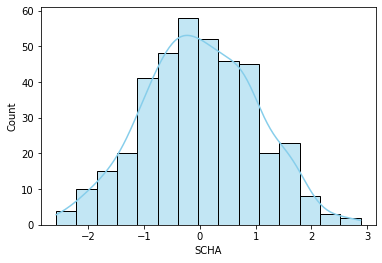

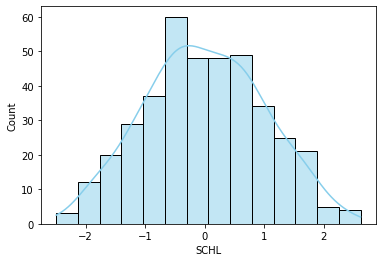

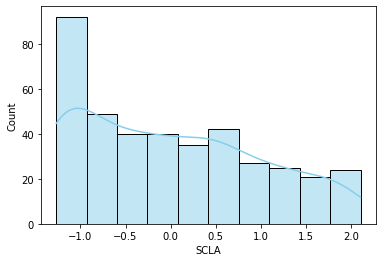

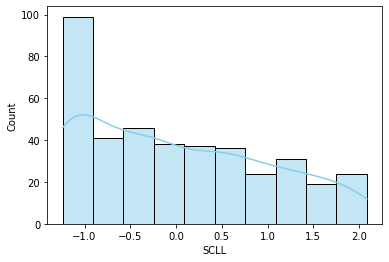

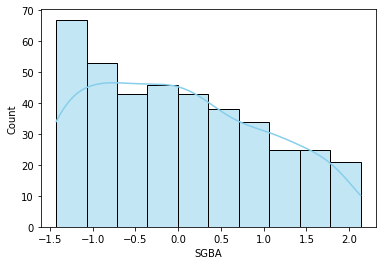

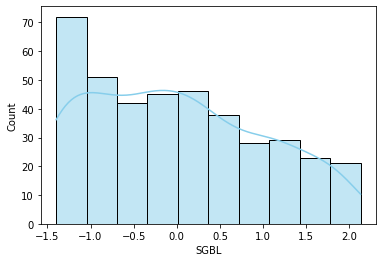

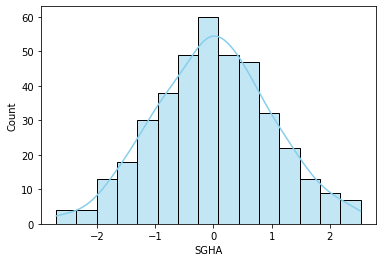

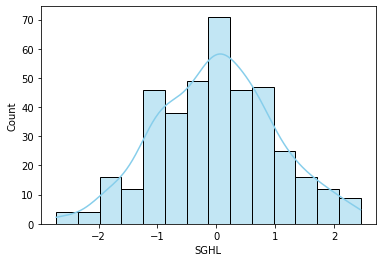

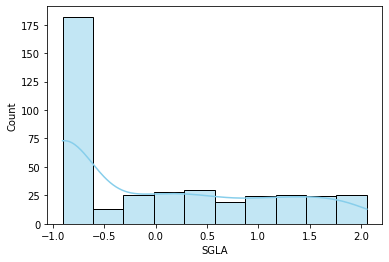

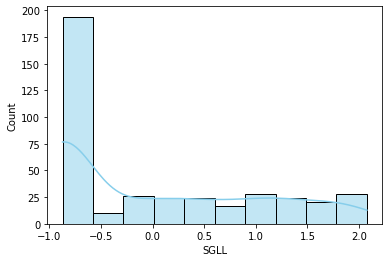

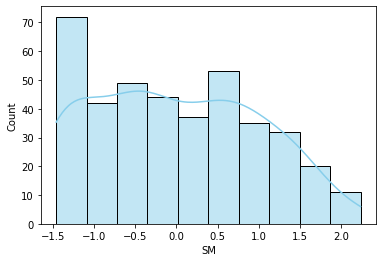

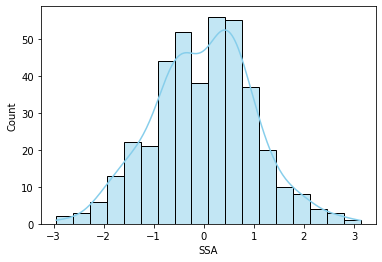

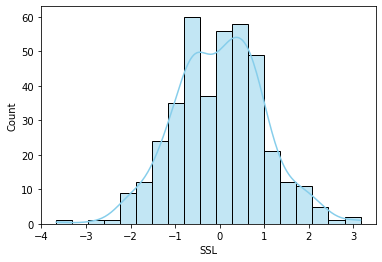

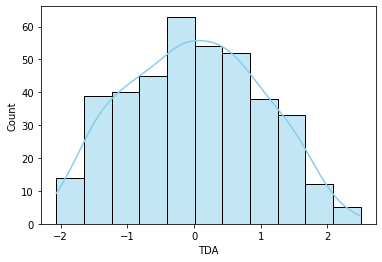

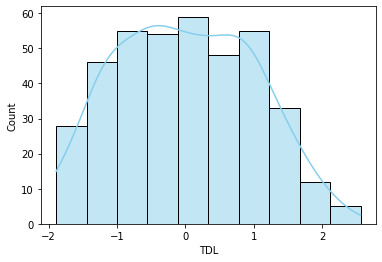

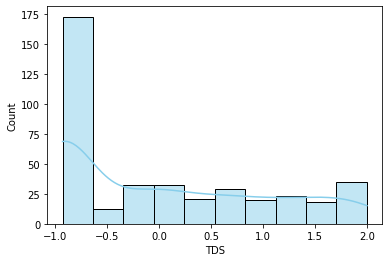

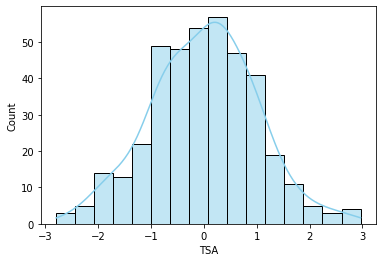

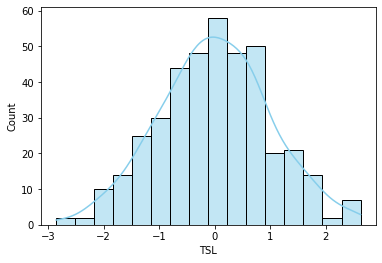

In [163]:
from sklearn.preprocessing import power_transform

unskewed_mean_df = mean_df.copy()
for col in count_cols:
    unskewed_mean_df[col] = power_transform(unskewed_mean_df[col].values.reshape(-1, 1) + 0.01, method="box-cox")
#     unskewed_mean_df[col] = np.log(1 + unskewed_mean_df[col])
    sns.histplot(data=unskewed_mean_df, x=col, kde=True, color="skyblue")
    plt.show()

<AxesSubplot:>

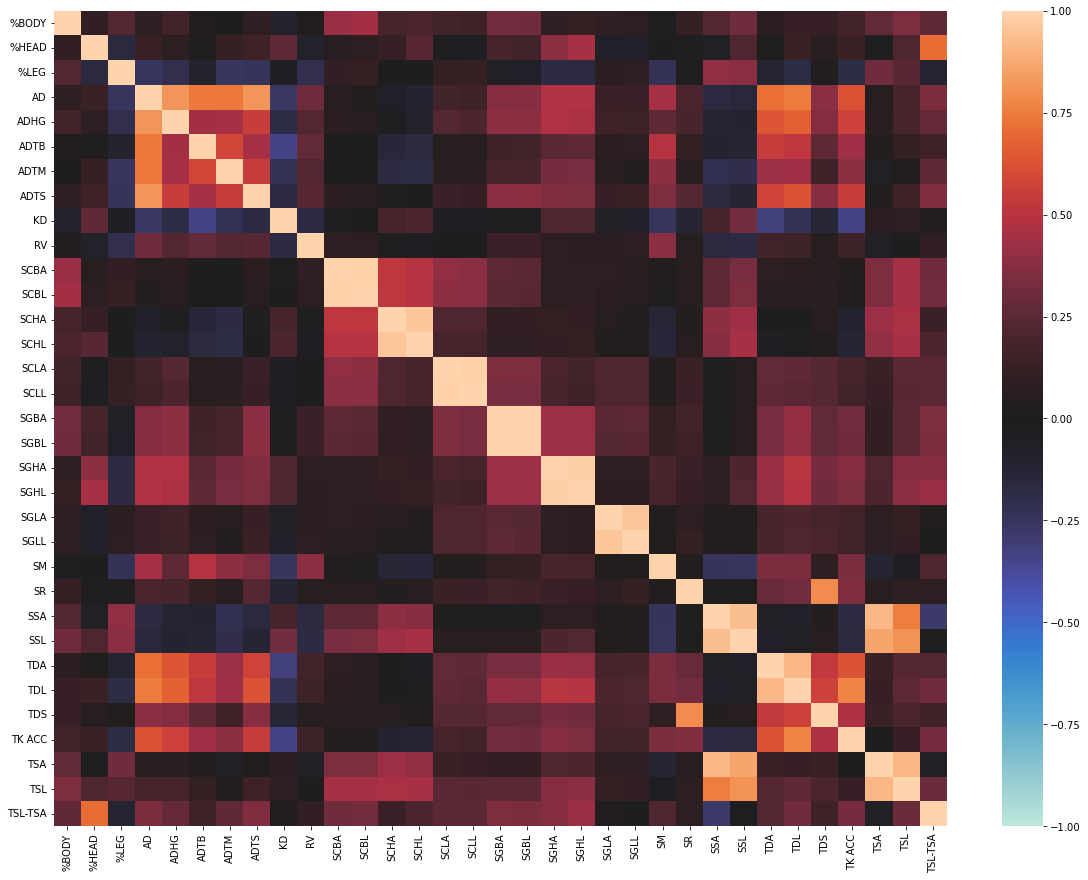

In [171]:
# 2) - heatmap
corr = unskewed_mean_df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr, vmin=-1, vmax=1, center=0)

In [165]:
# 3) PCA
    # imports
from sklearn.decomposition import PCA
from sklearn import preprocessing

# drop all NaN's i guess (why were there any in the first place?)
mean_df = unskewed_mean_df.dropna()
scaled_data = preprocessing.scale(unskewed_mean_df)
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [166]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

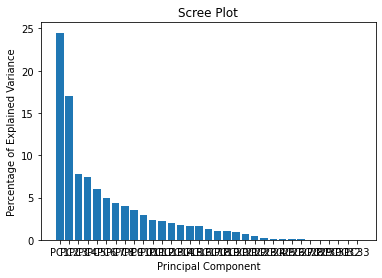

In [167]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

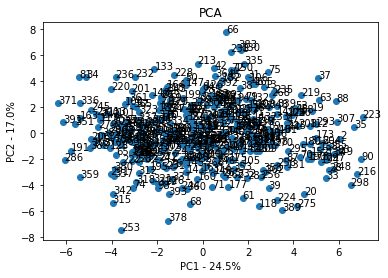

In [168]:
# need index for pca_df.. or do i?
pca_df = pd.DataFrame(pca_data, columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

In [169]:
# this doesn't really make any sense to me
sorted([*zip(mean_df.columns, pca_df.PC1)], key = lambda x:x[1])

[('TDL', -4.692003397012366),
 ('ADTM', -3.8758076144569262),
 ('KD', -3.301041829808908),
 ('%BODY', -2.665299267938574),
 ('SGLL', -1.8756652127937743),
 ('SCBL', -1.8508789979382962),
 ('AD', -1.317930854893427),
 ('SM', -1.2546781342301858),
 ('SSA', -1.1909821367548772),
 ('SSL', -0.9024705630814418),
 ('SCHA', -0.6818864278469327),
 ('TK ACC', -0.6265540786496495),
 ('SCLL', -0.18706851325968799),
 ('TSL-TSA', -0.1446758648449646),
 ('SGBA', -0.008864710889373859),
 ('ADHG', 0.2752724528091381),
 ('SCLA', 0.7695044264693819),
 ('RV', 0.8486399097746357),
 ('ADTS', 0.9349955128477021),
 ('TSA', 1.0342203685826235),
 ('SGBL', 1.3450448018378474),
 ('%HEAD', 1.3519662862623107),
 ('TSL', 1.986717663593029),
 ('SGHA', 2.1528954464603514),
 ('ADTB', 2.1598259322012847),
 ('SR', 2.276210533643957),
 ('TDA', 2.6790158157405806),
 ('SCHL', 2.721162349699249),
 ('SCBA', 2.9189071361681522),
 ('SGLA', 4.482690983032477),
 ('SGHL', 4.831807388197713),
 ('TDS', 5.573920426546863),
 ('%LEG', 